Model: "model_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16_input (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0  

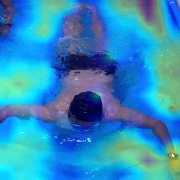

SHOULDER


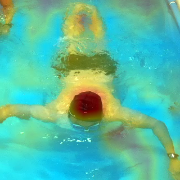

In [3]:
from utils import vgg16_mura_model, preprocess_image, show_imgwithheat
from gradcam import grad_cam,grad_cam_plus

# %% load the model
model = vgg16_mura_model('model_weights/VGG16_MURA.h5')
model.summary()

# %%
img_path =  '../test-multi/frame_472_3 (122).png'
img = preprocess_image(img_path)

# %% result of grad cam
heatmap = grad_cam(model, img,layer_name="block5_conv1",
                   label_name = ['WRIST', 'ELBOW', 'SHOULDER'],
                   #category_id = 0,
                   )
show_imgwithheat(img_path, heatmap)

# %% result of grad cam++
heatmap_plus = grad_cam_plus(model, img ,layer_name="block5_conv1",label_name = ['WRIST', 'ELBOW', 'SHOULDER'],)
show_imgwithheat(img_path, heatmap_plus)